We first generate the dynamical system trajectories data.
This has been done for you following the setup in [this paper](http://proceedings.mlr.press/v120/zhu20a/zhu20a.pdf).

In [1]:
import pickle
import numpy as np
from pylab import *

# from util import *

In [2]:
with open('data/data1.pk', 'rb') as f:
    data1 = pickle.load(f)

In [3]:
with open('data/data2.pk', 'rb') as f:
    data2 = pickle.load(f)

## Let's visualize the system trajectories

In [4]:
n_sample_1, n_step_1, n_dim = data1.shape # get the size of the trajectories

In [5]:
n_sample_2, n_step_2, n_dim = data2.shape

In [6]:
tgrid = np.linspace(0, 1.0, n_step_1 )

In [7]:
# function to plot traj
def traj_plot(n_sample, X, N, label=''):
#     xsol = []  
    x1_bound = lambda t: 2 + 0.1 * cos(10 * t) # plot a constraint
    for i in range(n_sample):
        xsol_i = np.squeeze([X[i][j] for j in range(N)])
#         xsol.append(xsol_i)

        plot(tgrid, xsol_i[:, 0].T, 'b.-', alpha=0.3)
    plot(tgrid, x1_bound(tgrid), 'r--')

    xlabel('time [s]')
    ylabel('x1')
    title(label)
    tight_layout()

    figure()

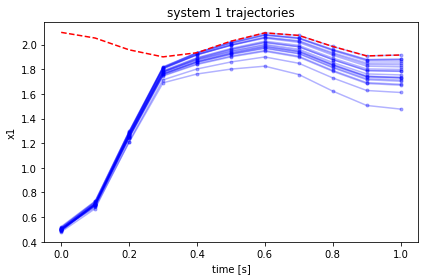

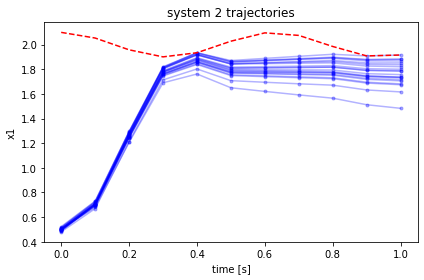

<Figure size 432x288 with 0 Axes>

In [8]:
traj_plot(n_sample_1, data1, n_step_1, label='system 1 trajectories')
traj_plot(n_sample_2, data2, n_step_2, label='system 2 trajectories')

- What can you observe from the two system trajectories

# Let's measure the MMD between states

We will use the following MMD estimator from



In [9]:
from sklearn.metrics.pairwise import rbf_kernel

In [10]:
mmd_sqr_all = []
for t in range(n_step_1):
    # prepare two sample test: x vs. y
    x = data1[:, t,:]
    y = data2[:, t,:]

    mmd_sqr_t = mmd_sqr(x, y, kernel=rbf_kernel, gamma=0.5) # note, mmd estimator can be <0
    
    mmd_sqr_all.append(mmd_sqr_t)

NameError: name 'mmd_sqr' is not defined

In [ ]:
plot(tgrid, mmd_sqr_all)
xlabel('time step')
ylabel('MMD$^2$ estimated')
tight_layout()

- Based on the above MMD estimator, can you say something about the system state distribution?
- What kernel did you use?
- If our goal is to stay below the red curve, which trajectory seems to be safer? Why?